In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('Libraries Imported')
from sklearn.model_selection import train_test_split
pd.__version__

Libraries Imported


'1.3.5'

In [2]:
data=pd.read_csv('/content/state_crime.csv') 

In [3]:
data.head(5)

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992


In [4]:
print(len(data))

3115


In [5]:
data.dtypes

State                             object
Year                               int64
Data.Population                    int64
Data.Rates.Property.All          float64
Data.Rates.Property.Burglary     float64
Data.Rates.Property.Larceny      float64
Data.Rates.Property.Motor        float64
Data.Rates.Violent.All           float64
Data.Rates.Violent.Assault       float64
Data.Rates.Violent.Murder        float64
Data.Rates.Violent.Rape          float64
Data.Rates.Violent.Robbery       float64
Data.Totals.Property.All           int64
Data.Totals.Property.Burglary      int64
Data.Totals.Property.Larceny       int64
Data.Totals.Property.Motor         int64
Data.Totals.Violent.All            int64
Data.Totals.Violent.Assault        int64
Data.Totals.Violent.Murder         int64
Data.Totals.Violent.Rape           int64
Data.Totals.Violent.Robbery        int64
dtype: object

In [6]:
data.shape

(3115, 21)

In [7]:
data.isnull().sum()

State                            0
Year                             0
Data.Population                  0
Data.Rates.Property.All          0
Data.Rates.Property.Burglary     0
Data.Rates.Property.Larceny      0
Data.Rates.Property.Motor        0
Data.Rates.Violent.All           0
Data.Rates.Violent.Assault       0
Data.Rates.Violent.Murder        0
Data.Rates.Violent.Rape          0
Data.Rates.Violent.Robbery       0
Data.Totals.Property.All         0
Data.Totals.Property.Burglary    0
Data.Totals.Property.Larceny     0
Data.Totals.Property.Motor       0
Data.Totals.Violent.All          0
Data.Totals.Violent.Assault      0
Data.Totals.Violent.Murder       0
Data.Totals.Violent.Rape         0
Data.Totals.Violent.Robbery      0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3115 entries, 0 to 3114
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          3115 non-null   object 
 1   Year                           3115 non-null   int64  
 2   Data.Population                3115 non-null   int64  
 3   Data.Rates.Property.All        3115 non-null   float64
 4   Data.Rates.Property.Burglary   3115 non-null   float64
 5   Data.Rates.Property.Larceny    3115 non-null   float64
 6   Data.Rates.Property.Motor      3115 non-null   float64
 7   Data.Rates.Violent.All         3115 non-null   float64
 8   Data.Rates.Violent.Assault     3115 non-null   float64
 9   Data.Rates.Violent.Murder      3115 non-null   float64
 10  Data.Rates.Violent.Rape        3115 non-null   float64
 11  Data.Rates.Violent.Robbery     3115 non-null   float64
 12  Data.Totals.Property.All       3115 non-null   i

In [9]:
data.describe()

,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,Data.Rates.Violent.Rape,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
count,3115.000000,3.115000e+03,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3.115000e+03,3.115000e+03,3.115000e+03,3.115000e+03,3.115000e+03,3.115000e+03,3115.000000,3115.000000,3115.000000
mean,1989.544141,9.708502e+06,3422.746388,980.836212,2255.336950,427.062504,397.877047,230.235441,6.477207,30.179872,120.786356,3.414501e+05,1.024037e+05,2.196652e+05,4.858270e+04,4.594917e+04,2.580668e+04,663.911717,3034.240449,15175.717817
std,17.299570,3.506750e+07,1575.438156,595.277457,970.917867,412.164938,287.498896,161.647444,5.886449,16.694626,143.516777,1.299392e+06,4.219078e+05,8.294311e+05,2.339655e+05,1.759960e+05,1.013202e+05,2437.666178,11714.612850,59589.454393
min,1960.000000,2.261670e+05,66.900000,126.300000,223.700000,31.100000,9.500000,3.600000,0.200000,0.800000,1.900000,4.320000e+02,7.510000e+02,1.489000e+03,1.940000e+02,3.700000e+01,1.400000e+01,1.000000,6.000000,8.000000
25%,1975.000000,1.279156e+06,2357.650000,561.800000,1575.450000,195.450000,217.200000,112.550000,3.100000,18.500000,37.300000,3.439550e+04,1.017150e+04,2.488000e+04,3.514000e+03,3.318000e+03,1.926000e+03,48.000000,328.000000,788.000000
50%,1990.000000,3.358000e+06,3420.200000,854.300000,2251.300000,315.400000,342.200000,195.800000,5.400000,28.800000,90.400000,1.015400e+05,2.871800e+04,6.743300e+04,1.033900e+04,1.154800e+04,6.378000e+03,186.000000,931.000000,3011.000000
75%,2005.000000,6.082836e+06,4433.900000,1218.200000,2876.900000,481.800000,518.250000,315.450000,8.400000,39.800000,152.200000,2.177235e+05,5.957700e+04,1.427570e+05,2.529950e+04,2.880400e+04,1.694900e+04,464.000000,1930.000000,7840.500000
max,2019.000000,3.282395e+08,9512.100000,5182.500000,5833.800000,4082.300000,2921.800000,1557.600000,80.600000,161.600000,1635.100000,1.296112e+07,8.632512e+06,8.142228e+06,6.004453e+06,1.932274e+06,1.135607e+06,24703.000000,139815.000000,687732.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

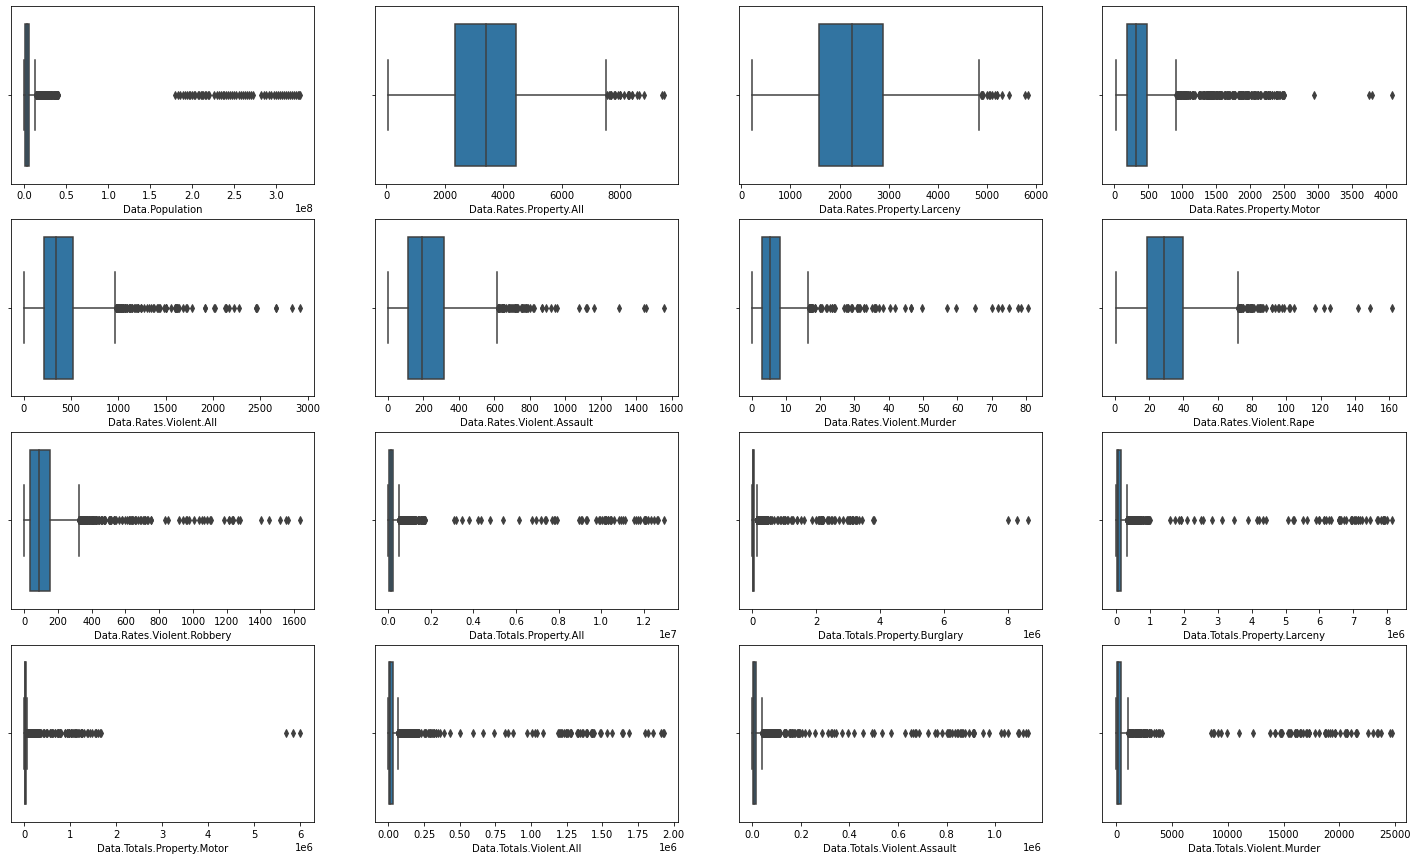

In [10]:
# Box Plot
import seaborn as sns
plt.figure(figsize=(25,15))
plt.subplot(4,4,1)
sns.boxplot(data['Data.Population'])
plt.subplot(4,4,2)
sns.boxplot(data['Data.Rates.Property.All'])
plt.subplot(4,4,3)
sns.boxplot(data['Data.Rates.Property.Larceny'])
plt.subplot(4,4,4)
sns.boxplot(data['Data.Rates.Property.Motor'])
plt.subplot(4,4,5)
sns.boxplot(data['Data.Rates.Violent.All'])
plt.subplot(4,4,6)
sns.boxplot(data['Data.Rates.Violent.Assault'])
plt.subplot(4,4,7)
sns.boxplot(data['Data.Rates.Violent.Murder'])
plt.subplot(4,4,8)
sns.boxplot(data['Data.Rates.Violent.Rape'])
plt.subplot(4,4,9)
sns.boxplot(data['Data.Rates.Violent.Robbery'])
plt.subplot(4,4,10)
sns.boxplot(data['Data.Totals.Property.All'])
plt.subplot(4,4,11)
sns.boxplot(data['Data.Totals.Property.Burglary'])
plt.subplot(4,4,12)
sns.boxplot(data['Data.Totals.Property.Larceny'])
plt.subplot(4,4,13)
sns.boxplot(data['Data.Totals.Property.Motor'])
plt.subplot(4,4,14)
sns.boxplot(data['Data.Totals.Violent.All'])
plt.subplot(4,4,15)
sns.boxplot(data['Data.Totals.Violent.Assault'])
plt.subplot(4,4,16)
sns.boxplot(data['Data.Totals.Violent.Murder'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


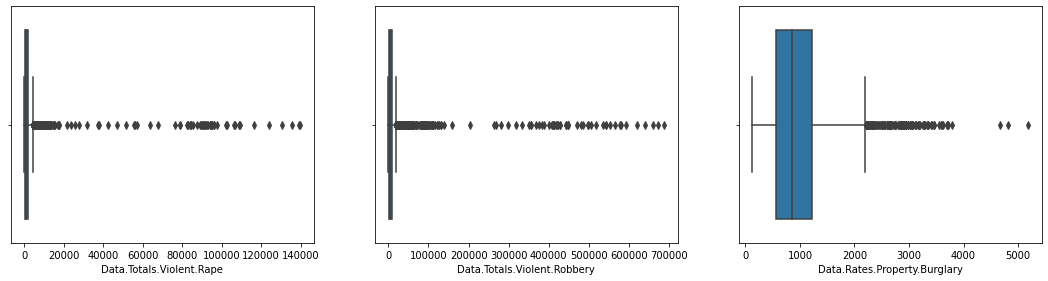

In [11]:
#boxplot
plt.figure(figsize=(25,20))
plt.subplot(4,4,1)
sns.boxplot(data['Data.Totals.Violent.Rape'])
plt.subplot(4,4,2)
sns.boxplot(data['Data.Totals.Violent.Robbery'])
plt.subplot(4,4,3)
sns.boxplot(data['Data.Rates.Property.Burglary'])

In [12]:
#dealing with outliers
data['Data.Population']=data['Data.Population'].clip(lower=data['Data.Population'].quantile(0.05),upper=data['Data.Population'].quantile(0.95))
data['Data.Rates.Property.All']=data['Data.Rates.Property.All'].clip(lower=data['Data.Rates.Property.All'].quantile(0.05),upper=data['Data.Rates.Property.All'].quantile(0.95))
data['Data.Rates.Property.Burglary']=data['Data.Rates.Property.Burglary'].clip(lower=data['Data.Rates.Property.Burglary'].quantile(0.05),upper=data['Data.Rates.Property.Burglary'].quantile(0.95))
data['Data.Rates.Property.Larceny']=data['Data.Rates.Property.Larceny'].clip(lower=data['Data.Rates.Property.Larceny'].quantile(0.05),upper=data['Data.Rates.Property.Larceny'].quantile(0.95))
data['Data.Rates.Property.Motor']=data['Data.Rates.Property.Motor'].clip(lower=data['Data.Rates.Property.Motor'].quantile(0.05),upper=data['Data.Rates.Property.Motor'].quantile(0.95))
data['Data.Rates.Violent.All']=data['Data.Rates.Violent.All'].clip(lower=data['Data.Rates.Violent.All'].quantile(0.05),upper=data['Data.Rates.Violent.All'].quantile(0.95))
data['Data.Rates.Violent.Assault']=data['Data.Rates.Violent.Assault'].clip(lower=data['Data.Rates.Violent.Assault'].quantile(0.05),upper=data['Data.Rates.Violent.Assault'].quantile(0.95))
data['Data.Rates.Violent.Murder']=data['Data.Rates.Violent.Murder'].clip(lower=data['Data.Rates.Violent.Murder'].quantile(0.05),upper=data['Data.Rates.Violent.Murder'].quantile(0.95))
data['Data.Rates.Violent.Rape']=data['Data.Rates.Violent.Rape'].clip(lower=data['Data.Rates.Violent.Rape'].quantile(0.05),upper=data['Data.Rates.Violent.Rape'].quantile(0.95))
data['Data.Rates.Violent.Robbery']=data['Data.Rates.Violent.Robbery'].clip(lower=data['Data.Rates.Violent.Robbery'].quantile(0.05),upper=data['Data.Rates.Violent.Robbery'].quantile(0.95))
data['Data.Totals.Property.Burglary']=data['Data.Totals.Property.Burglary'].clip(lower=data['Data.Totals.Property.Burglary'].quantile(0.05),upper=data['Data.Totals.Property.Burglary'].quantile(0.95))
data['Data.Totals.Property.Larceny']=data['Data.Totals.Property.Larceny'].clip(lower=data['Data.Totals.Property.Larceny'].quantile(0.05),upper=data['Data.Totals.Property.Larceny'].quantile(0.95))
data['Data.Totals.Property.Motor']=data['Data.Totals.Property.Motor'].clip(lower=data['Data.Totals.Property.Motor'].quantile(0.05),upper=data['Data.Totals.Property.Motor'].quantile(0.95))
data['Data.Totals.Violent.All']=data['Data.Totals.Violent.All'].clip(lower=data['Data.Totals.Violent.All'].quantile(0.05),upper=data['Data.Totals.Violent.All'].quantile(0.95))
data['Data.Totals.Violent.Assault']=data['Data.Totals.Violent.Assault'].clip(lower=data['Data.Totals.Violent.Assault'].quantile(0.05),upper=data['Data.Totals.Violent.Assault'].quantile(0.95))
data['Data.Totals.Violent.Murder']=data['Data.Totals.Violent.Murder'].clip(lower=data['Data.Totals.Violent.Murder'].quantile(0.05),upper=data['Data.Totals.Violent.Murder'].quantile(0.95))
data['Data.Totals.Violent.Rape']=data['Data.Totals.Violent.Rape'].clip(lower=data['Data.Totals.Violent.Rape'].quantile(0.05),upper=data['Data.Totals.Violent.Rape'].quantile(0.95))
data['Data.Totals.Violent.Robbery']=data['Data.Totals.Violent.Robbery'].clip(lower=data['Data.Totals.Violent.Robbery'].quantile(0.05),upper=data['Data.Totals.Violent.Robbery'].quantile(0.95))


In [13]:
data.head()


,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740.0,1035.4,355.9,613.89,103.67,186.6,138.1,12.4,...,27.5,33823,11626.0,19344.0,2853.0,6097.0,4512.0,406.0,281.0,898.0
1,Alabama,1961,3302000.0,985.5,339.3,613.89,103.67,168.5,128.9,12.9,...,19.1,32541,11205.0,18801.0,2535.0,5564.0,4255.0,427.0,252.0,630.0
2,Alabama,1962,3358000.0,1067.0,349.1,634.50,103.67,157.3,119.0,9.4,...,22.5,35829,11722.0,21306.0,2801.0,5283.0,3995.0,316.0,218.0,754.0
3,Alabama,1963,3347000.0,1150.9,376.9,683.40,103.67,182.7,142.1,10.2,...,24.7,38521,12614.0,22874.0,3033.0,6115.0,4755.0,340.0,192.0,828.0
4,Alabama,1964,3407000.0,1358.7,466.6,784.10,108.00,213.1,163.0,9.3,...,29.1,46290,15898.0,26713.0,3679.0,7260.0,5555.0,316.0,397.0,992.0


In [14]:
data.describe()

,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,Data.Rates.Violent.Rape,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
count,3115.000000,3.115000e+03,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3.115000e+03,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000
mean,1989.544141,4.995951e+06,3397.748045,950.501143,2241.980026,402.107653,380.121335,224.046087,6.011750,29.517014,107.919127,3.414501e+05,51766.178234,115053.688475,24016.483146,23629.445329,13378.830498,337.245393,1580.501059,7411.292648
std,17.299570,5.012980e+06,1443.143845,487.979633,909.501552,308.939338,216.002351,138.777553,3.425822,14.350716,83.187215,1.299392e+06,63798.092171,133495.381076,34420.272944,32027.817617,18122.460497,395.450486,1879.552728,11016.424067
min,1960.000000,5.735754e+05,601.160000,322.670000,613.890000,103.670000,73.900000,36.540000,1.500000,6.500000,12.900000,4.320000e+02,2855.500000,8911.900000,819.000000,587.400000,310.400000,13.000000,68.000000,86.000000
25%,1975.000000,1.279156e+06,2357.650000,561.800000,1575.450000,195.450000,217.200000,112.550000,3.100000,18.500000,37.300000,3.439550e+04,10171.500000,24880.000000,3514.000000,3318.000000,1926.000000,48.000000,328.000000,788.000000
50%,1990.000000,3.358000e+06,3420.200000,854.300000,2251.300000,315.400000,342.200000,195.800000,5.400000,28.800000,90.400000,1.015400e+05,28718.000000,67433.000000,10339.000000,11548.000000,6378.000000,186.000000,931.000000,3011.000000
75%,2005.000000,6.082836e+06,4433.900000,1218.200000,2876.900000,481.800000,518.250000,315.450000,8.400000,39.800000,152.200000,2.177235e+05,59577.000000,142757.000000,25299.500000,28804.000000,16949.000000,464.000000,1930.000000,7840.500000
max,2019.000000,1.930027e+07,5991.050000,2084.240000,3927.140000,1385.820000,846.110000,519.970000,13.200000,58.400000,315.680000,1.296112e+07,247571.700000,534705.700000,134304.000000,125975.300000,72976.100000,1519.900000,7347.800000,42565.100000


In [15]:
#k means clustering
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [16]:
x = data.iloc[:, [2,3]].values 

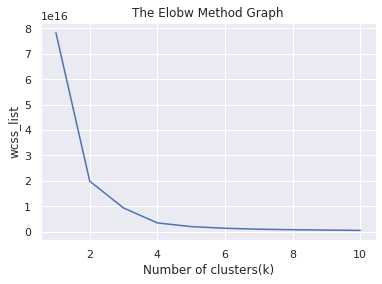

In [17]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [18]:
 #training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  
y_predict
data['target']=y_predict

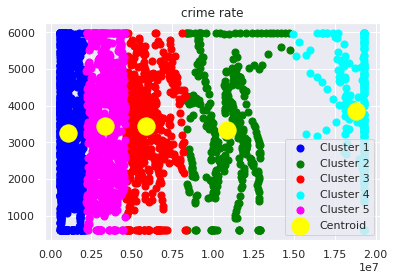

In [34]:
#visulaizing the clusters  
plt.scatter(x[y_predict == 0,0], x[y_predict == 0, 1], s = 50, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 50, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 50, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5') #for fifth cluster  

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('crime rate')  
plt.legend()  
plt.show()  

In [20]:
data.head()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery,target
0,Alabama,1960,3266740.0,1035.4,355.9,613.89,103.67,186.6,138.1,12.4,...,33823,11626.0,19344.0,2853.0,6097.0,4512.0,406.0,281.0,898.0,4
1,Alabama,1961,3302000.0,985.5,339.3,613.89,103.67,168.5,128.9,12.9,...,32541,11205.0,18801.0,2535.0,5564.0,4255.0,427.0,252.0,630.0,4
2,Alabama,1962,3358000.0,1067.0,349.1,634.50,103.67,157.3,119.0,9.4,...,35829,11722.0,21306.0,2801.0,5283.0,3995.0,316.0,218.0,754.0,4
3,Alabama,1963,3347000.0,1150.9,376.9,683.40,103.67,182.7,142.1,10.2,...,38521,12614.0,22874.0,3033.0,6115.0,4755.0,340.0,192.0,828.0,4
4,Alabama,1964,3407000.0,1358.7,466.6,784.10,108.00,213.1,163.0,9.3,...,46290,15898.0,26713.0,3679.0,7260.0,5555.0,316.0,397.0,992.0,4


In [21]:
data.drop(['State', 'Year'], axis = 1, inplace=True)

In [22]:
X = data.drop('target', axis = 1)
Y = data['target']
Y

0       4
1       4
2       4
3       4
4       4
       ..
3110    0
3111    0
3112    0
3113    0
3114    0
Name: target, Length: 3115, dtype: int32

In [26]:
import random
from sklearn.model_selection import train_test_split
seed=2
test=0.3
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=seed)

Accuracy: 0.9989304812834224


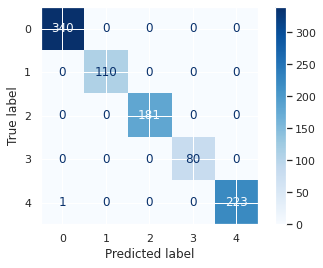

<Figure size 432x288 with 0 Axes>

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster = GradientBoostingClassifier()
gradient_booster.fit(X_train,y_train)
y_pred=gradient_booster.predict(X_test) 
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
result = accuracy_score(y_test,y_pred)
print("Accuracy:",result)
gradient_booster.fit(X_train, y_train)
plot_confusion_matrix(gradient_booster,X_test,y_test,cmap=plt.cm.Blues,values_format = '.5g')
plt.show()
plt.savefig("GB confusion.jpg",format='jpg')

In [29]:
#KNN 
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
 
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.25, random_state=0)  
  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [30]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train) 

KNeighborsClassifier()

In [31]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)   


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
#result = confusion_matrix(y_test, y_pred)
result = accuracy_score(y_test,y_pred)
print("Accuracy:",result)

Accuracy: 0.9743260590500642


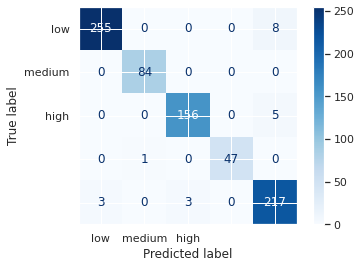

<Figure size 432x288 with 0 Axes>

In [33]:
plot_confusion_matrix(classifier,x_test,y_test,cmap=plt.cm.Blues,values_format = '.5g', display_labels = ["low","medium","high"])
plt.show()
plt.savefig("DT confusion.jpg",format='jpg')